# Simulating Quantum Circuits in Numpy 

> Corey Chivers, PhD. Corey.Chivers@pennmedicine.upenn.edu

The aim here is to gain a basic understanding of quantum computation by building up the mathematics in python and ultimately building a quantum circuit simulator using only numpy (so it won't be so mysterious to a Data Scientist like me!). This notebook is not meant to be a stand-alone introduction to quantum computing. It is rather the notes I took as I worked through a variety of excellent, and not-so excellent tutorials I found across the web.

In the excellent category, I would firmly place Andy Matuschak and Michael Nielsen's experimental essay [Quantum computing for the very curious](https://quantum.country/qcvc).

Additional Resources:
- https://www.quantum-inspire.com/kbase/what-is-a-quantum-algorithm
- https://en.wikipedia.org/wiki/Bloch_sphere
- http://qutip.org/docs/4.1/guide/guide-bloch.html

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Qubits

We'll fist create the base states $\vert 0 \rangle$ and $\vert 1 \rangle$ from which any state $\vert \psi \rangle$ can be constructed as $\alpha \vert 0 \rangle + \beta \vert 1 \rangle$.

In [2]:
c_one = np.complex(1,0)
c_zero = np.complex(0,0)

ket_zero = np.array([c_one, c_zero])
ket_one = np.array([c_zero, c_one])

ket_zero, ket_one

(array([1.+0.j, 0.+0.j]), array([0.+0.j, 1.+0.j]))

There is a normalization constraint on the state of a qubit such that $|\alpha|^2 + |\beta|^2 = 1$.

Let's make a little function to generate a random qubit state, which is just a vector in the Hilbert space as above following the normalization constraint.

In [3]:
def random_state():
    r1, i1, r2, i2 = np.random.uniform(-1,1,4)
    alpha = np.complex(r1, i1)
    beta = np.complex(r2, i2)
    norm = np.sqrt(np.absolute(alpha)**2 + np.absolute(beta)**2)
    alpha, beta = alpha/norm,  beta/norm
    return np.array([alpha, beta])

psi = random_state()
psi

array([ 0.21745536+0.47742145j, -0.63602245-0.56591287j])

## Gates

Much as in classical computing, the concept of a gate is central to the quantum circuit. Gates can be written as transformations of the state vector.

The simplest is the $X$ gate, analogous to the classical NOT gate: $= \begin{bmatrix} 
0 & 1 \\
1 & 0 \\
\end{bmatrix}$

In [4]:
Chi_gate = np.array([[0,1],[1,0]])
Chi_gate

array([[0, 1],
       [1, 0]])

Matrix multiplication of a qubit in one of the two computational basis states has the expected effect of flipping the state to the other computational basis.

In [5]:
Chi_gate@ket_zero

array([0.+0.j, 1.+0.j])

In [6]:
Chi_gate@ket_one

array([1.+0.j, 0.+0.j])

The Hadamard gate, $H := {{1}\over{\sqrt{2}}}
\begin{bmatrix} 
1 & 1 \\
1 & -1 \\
\end{bmatrix}
$

is a key gate in quantum computing, for reasons we'll see later.

In [7]:
H_gate = 1/np.sqrt(2.0) * np.array([[1,1],[1,-1]])
H_gate

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [8]:
H_gate@ket_zero

array([0.70710678+0.j, 0.70710678+0.j])

In [9]:
H_gate@ket_one

array([ 0.70710678+0.j, -0.70710678+0.j])

The identity matrix is equivilant to a wire (does not change the state of a qubit):

In [10]:
I_gate = np.array([[1,0],[0,1]])

## Visualizing Qubits

A common way to visualize the quantum state of a qubit is a Bloch Sphere. This transforms the vector space in such a way as to have the antipodal points correspond the two mutually orthogonal state vectors. Instead, here I'll represent the pure state of a qubit using the complex plane. By using the colors blue and red for the $\alpha$, and $\beta$ coefficients, respectively, we can see the state projected as these two vectors in the complex plane.

Since the computational basis states are what we're interested in at the end of a quantum computation, I'll also plot the probability distribution of observations predicted by a qubit in the given state.

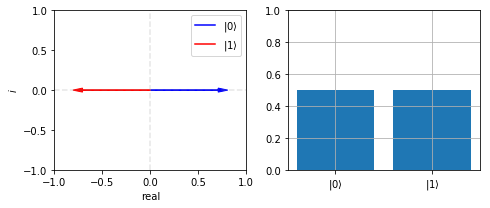

In [11]:
def plt_state_as_vecs(psi):
    ket_alpha, ket_beta = psi
    fig, axx = plt.subplots(1,2, figsize=(7,3))
    ax = axx[0]
    ax.axhline(0,ls='--',color='grey',alpha=0.2)
    ax.axvline(0,ls='--',color='grey',alpha=0.2)
    ax.plot(0, 0, color='blue',label=r'$\vert 0 \rangle$')
    ax.plot(0, 0, color='red',label=r'$\vert 1 \rangle$')
    ax.arrow(0,0,ket_alpha.real, ket_alpha.imag, head_width=0.05, head_length=0.1, color='blue')
    ax.arrow(0,0,ket_beta.real, ket_beta.imag, head_width=0.05, head_length=0.1, 
             color='red')

    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_xlabel('real')
    ax.set_ylabel(r'$i$')
    ax.legend(loc=0)
    
    ax = axx[1]
    pr_zero, pr_one = np.absolute(psi[0])**2, np.absolute(psi[1])**2
    ax.bar([0,1],[pr_zero, pr_one])
    ax.set_xticks([0,1])
    ax.set_xticklabels([r'$\vert 0 \rangle$',r'$\vert 1 \rangle$'])
    ax.set_ylim(0,1)
    ax.grid(True)
    
    plt.tight_layout()

plt_state_as_vecs(H_gate@ket_one)

Initiate a qubit in a random pure state: 

0.07780657112837541


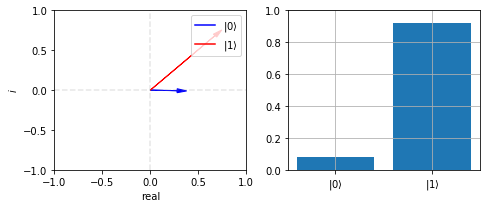

In [12]:
psi = random_state()
print(np.absolute(psi[0])**2)
plt_state_as_vecs(psi)

Observe that the $X$ gate swaps the component vectors:

0.9221934288716244


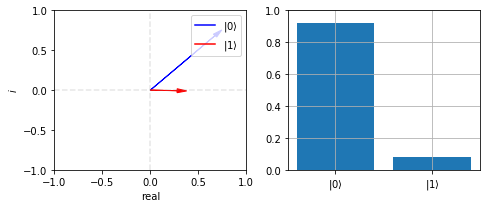

In [13]:
psi_n = Chi_gate@psi
print(np.absolute(psi_n[0])**2)
plt_state_as_vecs(psi_n)

And that indeed, the total probability over computational basis states is equal to one

In [14]:
np.absolute(psi[0])**2 + np.absolute(psi[1])**2

0.9999999999999998

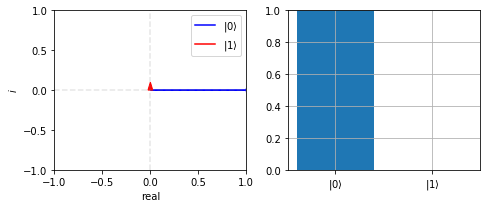

In [15]:
plt_state_as_vecs(ket_zero)

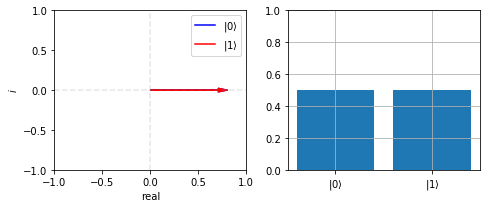

In [16]:
plt_state_as_vecs(H_gate@ket_zero)

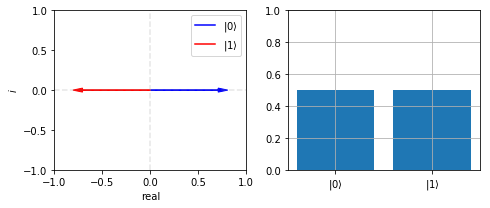

In [17]:
plt_state_as_vecs(H_gate@ket_one)

The Hadamard gate twice results in a quantum wire.

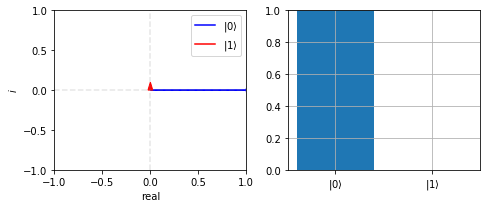

In [18]:
plt_state_as_vecs(H_gate@(H_gate@ket_zero))

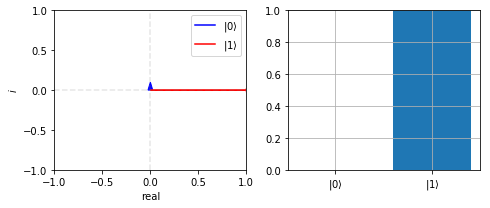

In [19]:
plt_state_as_vecs(H_gate@(H_gate@ket_one))

In [20]:
H_gate@H_gate

array([[1., 0.],
       [0., 1.]])

So for an arbitrary quantum state $\vert \psi \rangle$ to the circuit, then the output must be $HH \vert \psi \rangle = I \vert \psi \rangle = \vert \psi \rangle$

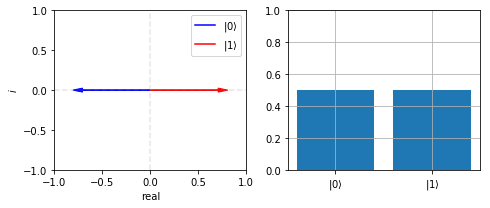

In [21]:
plt_state_as_vecs(Chi_gate@(H_gate@ket_one))

### Measurement in the computational basis

This is a fundamental primitive in quantum computing: it’s the way we typically extract information from our quantum computers. Suppose a qubit is in the state $\alpha|0\rangle+\beta|1\rangle$. When you measure this qubit in the computational basis it gives you a classical bit of information: it gives you the outcome 0 with probability $|\alpha|^2$, and the outcome 1 with probability $|\beta|^2$.

In [22]:
def comp_basis_meas(psi):
    pr_zero = np.absolute(psi[0])**2
    U = np.random.uniform()
    if pr_zero > U:
        return 0
    else:
        return 1

Let's do the following computational basis measurement:

![circuit1](circuit1.png)

In [23]:
register = H_gate@(Chi_gate@ket_one)
comp_basis_meas(register)

0

In [24]:
comp_basis_meas(register)

1

In [25]:
comp_basis_meas(register)

1

In [26]:
comp_basis_meas(Chi_gate@ket_one)

0

Qubit gates are always unitary. That is, 
$$
U^\dagger U = I
$$

Where the dagger operator is the _adjoint_, or _complex transpose_, or _Hermitian conjugate_, or just _conjugate_.

More explicitly, in matrix form,

$$
\left[ \begin{array}{cc}
a & b \\
c & d 
\end{array} 
\right]^\dagger = 
\left[ \begin{array}{cc} 
a^* & c^* \\
b^* & d^*
\end{array}
\right]
$$

Where $x^*$ is the complex conjugate. This is just the mapping of $a+bi \mapsto a-bi$.

**Unitary gates preserve the length of their inputs.** In a sense, the unitary matrices are a complex generalization of real rotations and reflections.

In [27]:
def dagger(u):
    ut = np.conj(u.T)
    return ut

def is_unitary(U, tol = 2e-10):
    I = np.diag(np.ones(U.shape[0]))
    U_dagger_U = dagger(U)@U
    return ((U_dagger_U - I)**2 < tol).mean() == 1

# Check is unitary
is_unitary(Chi_gate), is_unitary(H_gate)

(True, True)

### Pauli Matrices (X, Y, Z gates)

We've already seen the $X$ or 'NOT' gate. The $Y$ gate is similar to the $X$ gate, but instead of 1s on the off-diagonal, it has $i$ and $−i$, so it takes $|0\rangle$to $i|1\rangle$ and $|1\rangle$ to $-i|0\rangle$:

$$
Y := \left[ \begin{array}{cc} 
0 & -i \\ 
i & 0 \end{array} \right].
$$

The $Z$ gate leaves $|0\rangle$ unchanged, and takes $|1\rangle$ to $-|1\rangle$:

$$
Z := \left[ \begin{array}{cc} 
1 & 0 \\
0 & -1 \end{array} \right].
$$


In [28]:
Z_gate = np.array([[1,0],[0,-1]])
Z_gate

array([[ 1,  0],
       [ 0, -1]])

There is also a rotation gate:

$$
\left[ \begin{array}{cc} 
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta) 
\end{array} \right].
$$

And many others, but let's move on to putting these into a more interesting circuit.

## 2-qubit Circuit


In [29]:
def string_rep_states(n_qubits=3):
    state_strs = ['' for _ in range(2**n_qubits)]
    basis_strs = ['0', '1']

    for q in range(n_qubits):
        for i in range(len(state_strs)):
            b = basis_strs[((i//(2**q))) % 2]
            state_strs[i] =  state_strs[i] + b

    return state_strs

string_rep_states(2)

['00', '10', '01', '11']

![h_cnot_circuit](h_cnot_circuit.png)

In [30]:
s1 = ket_one@H_gate
s1

array([ 0.70710678+0.j, -0.70710678+0.j])

In [31]:
s1 = np.concatenate([s1,ket_zero])
s1

array([ 0.70710678+0.j, -0.70710678+0.j,  1.        +0.j,  0.        +0.j])

In [32]:
cnot = np.array([[1,0,0,0],
                 [0,1,0,0],
                 [0,0,0,1],
                 [0,0,1,0]])

In [33]:
s2 = s1@cnot
s2

array([ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,  1.        +0.j])

In [34]:
I_gate

array([[1, 0],
       [0, 1]])

In [35]:
cnot

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [36]:
np.kron(np.array([1]), I_gate)

array([[1, 0],
       [0, 1]])

In [37]:
def build_gate_mat(gates):
    gmat = np.array([1])
    for g in gates:
        gmat = np.kron(gmat, g)
    return gmat

def basis_state_probs(svec):
    return np.array([np.absolute(s)**2 for s in svec])


register = build_gate_mat([ket_zero, ket_zero]) # |0>, |0>  2 Input qubits in the 0 computational basis state
gates1 = [H_gate, I_gate]
gates2 = [cnot]

g1 = build_gate_mat(gates1)
g2 = build_gate_mat(gates2)

out_register = register@g1@g2
basis_state_probs(out_register)

array([0.5, 0. , 0. , 0.5])

In [38]:
list(zip(string_rep_states(2), basis_state_probs(out_register)))

[('00', 0.4999999999999999),
 ('10', 0.0),
 ('01', 0.0),
 ('11', 0.4999999999999999)]

This is **quantum entanglement!!!** After going through this circuit, the computational basis states of these two qubits will be forever perfectly correlated when measured! There is an equal chance we'll measure 00 or 11, but never 01, or 10.

In [39]:
basis_state_probs(g2@g1@register)

array([0.5, 0. , 0. , 0.5])

In [40]:
register

array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [41]:
g1

array([[ 0.70710678,  0.        ,  0.70710678,  0.        ],
       [ 0.        ,  0.70710678,  0.        ,  0.70710678],
       [ 0.70710678,  0.        , -0.70710678, -0.        ],
       [ 0.        ,  0.70710678, -0.        , -0.70710678]])

In [42]:
g2

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [43]:
register@g1

array([0.70710678+0.j, 0.        +0.j, 0.70710678+0.j, 0.        +0.j])

In [44]:
out_register

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

In [45]:
string_rep_states(3)

['000', '100', '010', '110', '001', '101', '011', '111']

In [46]:
def plt_measure(out_register):
    n_qubits = int(np.log2(out_register.shape[0]))
    fig, ax = plt.subplots(1,1)
    ax.bar(range(2**n_qubits), basis_state_probs(out_register))
    ax.set_xticks(range(2**n_qubits))
    ax.set_xticklabels(string_rep_states(n_qubits))
    ax.set_ylim(-0,1)
    ax.grid(True)
    ax.set_ylabel(r'$P(S_c)$')
    ax.set_xlabel(r'$S_c$')
    plt.show()

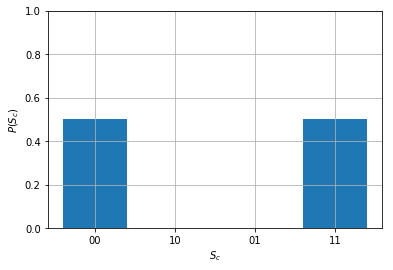

In [47]:
plt_measure(register@g1@g2)

# Toffoli Gate

The Toffoli Gate is a 3-qubit equivilant to the classical AND operation. It is like the CNOT, but has 2 control qubits and one target. One way to build a Toffoli gate is by composition of multiple 1 and 2 qubit gates. One of these decompositions is:

![tofolli](tofolli.png)

Let's implement this 3-qubit circuit entirely in numpy.

In [48]:
T_gate = np.array([[1,0],
                   [0,np.exp(np.complex(0,np.pi/4.))]])
T_gate

array([[1.        +0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.70710678+0.70710678j]])

In [49]:
dagger(T_gate)

array([[1.        -0.j        , 0.        -0.j        ],
       [0.        -0.j        , 0.70710678-0.70710678j]])

In [50]:
## Cnot gate where the control qubit is q1 and the target is q3
## Written out explicitly instead of as the kronecker product 
## of I and cnot (for the q2-q3 control-target case).
cnot3 = np.array([ [0, 1, 0, 0, 0, 0, 0, 0],
                   [1, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 1, 0, 0, 0, 0, 0],
                   [0, 0, 0, 1, 0, 0, 0, 0],
                   [0, 0, 0, 0, 1, 0, 0, 0],
                   [0, 0, 0, 0, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 1],
                   [0, 0, 0, 0, 0, 0, 1, 0]])

In [51]:
build_gate_mat([Chi_gate, I_gate])

array([[0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0]])

In [52]:
build_gate_mat([I_gate, Chi_gate])

array([[0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [53]:
g1 = build_gate_mat([I_gate, I_gate, H_gate])
g2 = build_gate_mat([I_gate, cnot])
g3 = build_gate_mat([I_gate, I_gate, dagger(T_gate)])
g4 = cnot3
g5 = build_gate_mat([I_gate, I_gate,T_gate])
g6 = build_gate_mat([I_gate, cnot])
g7 = build_gate_mat([I_gate, I_gate, dagger(T_gate)])
g8 = cnot3
g9 = build_gate_mat([I_gate, T_gate, T_gate])
g10 = build_gate_mat([cnot, H_gate])
g11 = build_gate_mat([T_gate,  dagger(T_gate), I_gate])
g12 = build_gate_mat([cnot, I_gate])

gs = [g1, g2, g3, g4, g5, g6, g7, g8, g9, g10, g11, g12]

in_states = [ket_one, ket_one, ket_one] ## read qubits from bottom to top
n_qubits = len(in_states)
in_states.reverse()
register = build_gate_mat(in_states) # |0>, |0>  2 Input qubits in the 0 computational basis state

In [54]:
toffoli_gate = g1@g2@g3@g4@g5@g6@g7@g8@g9@g10@g11@g12
toffoli_gate.shape

(8, 8)

In [55]:
def compose_circuit(gates):
    n_qubits = int(np.log2(gates[0].shape[0]))
    gout = np.identity(2**n_qubits)
    for g in gs:
        gout = gout@g
    return gout

toffoli_gate_composed = compose_circuit(gs)
toffoli_gate_composed == toffoli_gate

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]])

In [56]:
out_register = register@toffoli_gate_composed
out_register

array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        1.00000000e+00-2.22044605e-16j, -2.29934717e-17+1.66533454e-16j])

In [57]:
basis_state_probs(out_register)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.82620909e-32])

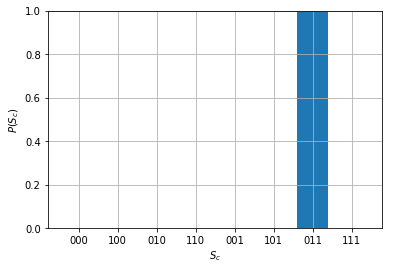

In [58]:
plt_measure(out_register)

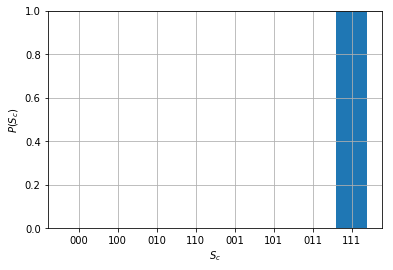

In [59]:
in_states = [ket_zero, ket_one, ket_one] ## read qubits from bottom to top
n_qubits = len(in_states)
in_states.reverse()
register = build_gate_mat(in_states) # |0>, |0>  2 Input qubits in the 0 computational basis state
out_register = register@toffoli_gate_composed
plt_measure(out_register)

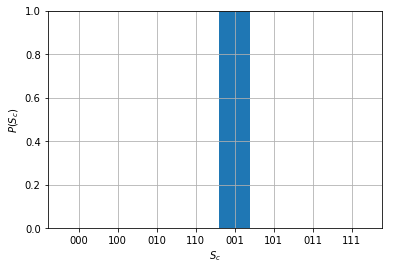

In [60]:
in_states = [ket_zero, ket_zero, ket_one] ## read qubits from bottom to top
n_qubits = len(in_states)
in_states.reverse()
register = build_gate_mat(in_states) # |0>, |0>  2 Input qubits in the 0 computational basis state
out_register = register@toffoli_gate_composed
plt_measure(out_register)

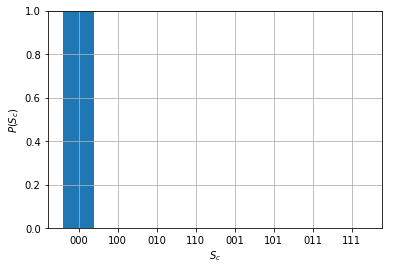

In [61]:
in_states = [ket_zero, ket_zero, ket_zero] ## read qubits from bottom to top
n_qubits = len(in_states)
in_states.reverse()
register = build_gate_mat(in_states) # |0>, |0>  2 Input qubits in the 0 computational basis state
out_register = register@toffoli_gate_composed
plt_measure(out_register)